<a href="https://colab.research.google.com/github/mkjubran/Fundamentals-of-AI-and-Machine-Learning/blob/main/FITTING_AND_EVALUATING_LINEAR_REGRESSION_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FITTING AND EVALUATING LINEAR REGRESSION MODELS


In this notebook, we will demonstrate how to build and evaluate linear regression models. We will work on part of the modified version of the cardiovascular dataset from Kaggle (https://www.kaggle.com/code/sulianova/eda-cardiovascular-data/data). 


# Import Libraries

First, we need to import some libraries that will be used during the creation and evaluation of linear regression models.

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

# Data Preparation

**Clone the dataset Repository**

The modified dataset can be cloned from the GitHub repository https://github.com/mkjubran/AIData.git as below

In [2]:
!rm -rf ./AIData
!git clone https://github.com/mkjubran/AIData.git

Cloning into 'AIData'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 31 (delta 12), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (31/31), done.


**Read the dataset**

The data is stored in the MedicalCostPersonalDatasets.csv file. Read the input data into a dataframe using the Pandas library (https://pandas.pydata.org/) to read the data.

In [3]:
df = pd.read_csv("/content/AIData/MedicalCostPersonalDatasets.csv",sep=",")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Display Data Info**

Display some information about the dataset using the info() method

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataset contains 1338 records with 6 features for each record. Four features are numeric and the rest are objects (strings).

# Clean Data and Remove Outliers

**Check Missing Values**

Check if there are any missing values in the dataset

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

As can be observed, no missing data in the dataset.

**Remove Outliers**

Let us get the description of the dataset and check if there is anything not normal

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The minimum age is 18 years which is the age at which a person can get an insurance plan. According to the records, the maximum age is 64 years. The ideal value of the bmi feature should be between 18.5 and 24.9, so there are records in the dataset for persons with non-ideal bmi values. The number of children is between 0 (no children) and 5. And the charges feature which is the target feature is always positive.

Let's use the box plot to check for any outliers in the dataset. As for the 'children' feature, its value is between 0 and 5, and thus no outliers. Let us check for the 'age' and 'bmi' features (independent variables).

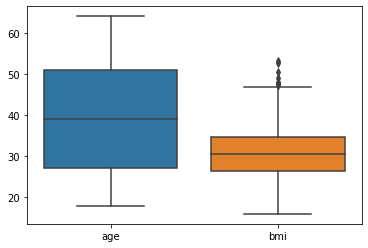

In [7]:
sns.boxplot(data=df[["age", "bmi"]])

There are no outliers for the 'age' feature and there are few outliers for the 'bmi' feature. The values of these outliers have values close to the third quartile, thus we will not remove them. Let us check the outliers in the 'charges' feature.

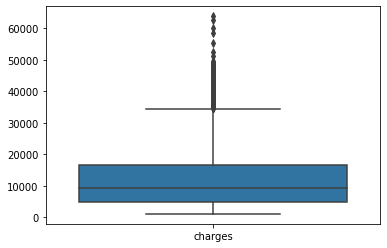

In [8]:
sns.boxplot(data=df[["charges"]])

There are many outliers above the third quartile. Before handling them, let us check the distribution of the 'charges' feature.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


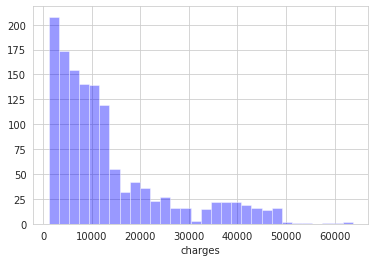

In [9]:
sns.set_style('whitegrid')
sns.distplot(df['charges'], kde = False, color ='blue', bins = 30)

So the outliers appeared in the boxplot because the 'charges' feature has a skewed distribution which is due to the fact that most of the records are for medication that has low and moderate costs and only few records for high costs. So we should keep these high charges so that the regression model can predict them.

# Encode Categorical Data and Check the Significance of Features

**Encode Categorical Features**

The 'sex', 'smoker', and 'region' are three categorical features that we need to encode. We will encode them using one hot encoding.

In [10]:
df = pd.get_dummies(df)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Remember to drop one of the columns that resulted from the hot encoding of each feature. Also, mae sure that the original features ('sex', 'smoker', and 'region') are dropped too.

In [11]:
df.drop(['sex_male','region_northeast','smoker_no'],axis=1,inplace=True)
df.head()

,age,bmi,children,charges,sex_female,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,1,0,0,1
1,18,33.770,1,1725.55230,0,0,0,1,0
2,28,33.000,3,4449.46200,0,0,0,1,0
3,33,22.705,0,21984.47061,0,0,1,0,0
4,32,28.880,0,3866.85520,0,0,1,0,0


**Check the significance of features for the regression model**

Next ew will use the statistical models to check the significance of every feature for the regression model 

In [12]:
X=df.drop('charges',axis=1)
Y=df.charges
X = sm.add_constant(X, prepend=True)
lm = sm.OLS(endog=Y, exog=X,)
lm = lm.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:48:30   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.207e+04    999.649  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The model achieves an R-squared of 0.751, which means that the model manages to explain 75.1% of the variability observed in the charges. The Adj. R-squared is 0.749 which shows the goodness of the regression model (above 0.5 is good). Also, the p-values of all the features except 'sex_female' and 'region_northwest' is significant (lower value means rejecting the Null Hypotheses that the feature does not influence the target feature).

# Perform And Evaluate Linear Regression

**Performing Linear Regression**

We will start by splitting the dataset into training and testing splits of the dataset, the split ratio is usually 80% training and 20% testing.

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=200)
print('Size of the dataset = {}'.format(len(X)))
print('Size of the training dataset = {} ({}%)'.format(len(x_train), 100*len(x_train)/len(X)))
print('Size of the testing dataset = {} ({}%)'.format(len(x_test), 100*len(x_test)/len(X)))

Size of the dataset = 1338
Size of the training dataset = 1070 (79.97010463378176%)
Size of the testing dataset = 268 (20.029895366218238%)


Notice that we used a random_state so that the results are reproducible. You should avoid setting this argument in your production code so that the split is random at every run.

Now, we will import the regression model from sklearn and train the model using the training split of the dataset.

In [14]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

**Evaluate Linear Regression**

To evaluate the model, we will compute the R2-score using the training and testing splits of the dataset

In [15]:
R2Score_train = lm.score(x_train, y_train)
R2Score_test = lm.score(x_test, y_test)

from prettytable import PrettyTable
t = PrettyTable(['R2-Score', 'Linear Regression (%)'])
t.add_row(['Training', R2Score_train*100])
t.add_row(['Testing', R2Score_test*100])
print(t)

+----------+-----------------------+
| R2-Score | Linear Regression (%) |
+----------+-----------------------+
| Training |   74.62213675223181   |
| Testing  |   76.51453096217679   |
+----------+-----------------------+


Let us try to perform the linear regression but without the less significant features; 'sex_female' and 'region_northwest'.

In [16]:
X2=df.drop(['sex_female', 'region_northwest','charges'], axis=1)
Y2=df.charges
x2_train, x2_test, y2_train, y2_test = train_test_split(X2,Y2,test_size=0.2, random_state=200)
lm.fit(x2_train,y2_train)
R2Score_train = lm.score(x2_train, y2_train)
R2Score_test = lm.score(x2_test, y2_test)

from prettytable import PrettyTable
t = PrettyTable(['R2-Score', 'Linear Regression (%)'])
t.add_row(['Training', R2Score_train*100])
t.add_row(['Testing', R2Score_test*100])
print(t)

+----------+-----------------------+
| R2-Score | Linear Regression (%) |
+----------+-----------------------+
| Training |   74.61877006610646   |
| Testing  |    76.4814460146058   |
+----------+-----------------------+


So dropping the 'sex_female' and 'region_northwest' did not improve the R2-score.

**Polynomial Regression**

Let us try polynomial regression to improve the performance of linear regression.

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg  = PolynomialFeatures(degree=2)
Xp = poly_reg.fit_transform(X)
xp_train, xp_test, yp_train, yp_test = train_test_split(Xp,Y,test_size=0.2, random_state=200)
lm.fit(xp_train,yp_train)
R2Score_train = lm.score(xp_train, yp_train)
R2Score_test = lm.score(xp_test, yp_test)

from prettytable import PrettyTable
t = PrettyTable(['R2-Score', 'Linear Regression (%)'])
t.add_row(['Training', R2Score_train*100])
t.add_row(['Testing', R2Score_test*100])
print(t)

+----------+-----------------------+
| R2-Score | Linear Regression (%) |
+----------+-----------------------+
| Training |   84.21526796259815   |
| Testing  |    86.2677684410235   |
+----------+-----------------------+


As can be observed the polynomial regression provided better R2-score.

# Saving and Loading Models

We will learn how to save and load models. We will do that using two methods; Pickle and Joblib.

Option #1: we will save the regression model using pickle library (https://docs.python.org/3/library/pickle.html).

In [18]:
import pickle
with open('./Model.pickle','wb') as f:
  pickle.dump(lm,f)

with open('./poly_reg.pickle','wb') as f:
  pickle.dump(poly_reg,f)

The linear model and the transformation are saved in your current directory (.\content). It doesn't include the dataframes or any other libraries.

We will load the models useing the load() method from the pickle library as

In [19]:
with open('./Model.pickle','rb') as f:
  lm_pickle = pickle.load(f)

with open('./poly_reg.pickle','rb') as f:
  poly_reg_pickle = pickle.load(f)

Option#2: Another option is to save the models using joblib from sklearn library (https://scikit-learn.org/stable/modules/model_persistence.html) as

In [20]:
import joblib as jb
jb.dump(lm, './Model.joblib') 
jb.dump(poly_reg, './poly_reg.joblib') 

['./poly_reg.joblib']

And to lead these models, we will use the load() method

In [21]:
lm_joblib = jb.load('./Model.joblib')
poly_reg_joblib = jb.load('./poly_reg.joblib')


# Predict New Values Using Models

To predict the target values for new data, we will use the loaded models

In [22]:
x_test.head()

,const,age,bmi,children,sex_female,smoker_yes,region_northwest,region_southeast,region_southwest
992,1.0,50,31.600,2,1,0,0,0,1
937,1.0,39,24.225,5,1,0,1,0,0
688,1.0,47,24.100,1,1,0,0,0,1
1185,1.0,45,23.560,2,0,0,0,0,0
1137,1.0,26,22.230,0,1,0,1,0,0


In [23]:
x_new=x_test.copy()
xp_test = poly_reg_pickle.transform(x_new)
y_predict = lm_pickle.predict(xp_test)
dfnew=x_new
dfnew['charges_predict']=y_predict
dfnew.head()

,const,age,bmi,children,sex_female,smoker_yes,region_northwest,region_southeast,region_southwest,charges_predict
992,1.0,50,31.600,2,1,0,0,0,1,11453.129078
937,1.0,39,24.225,5,1,0,1,0,0,11082.348626
688,1.0,47,24.100,1,1,0,0,0,1,9549.069779
1185,1.0,45,23.560,2,0,0,0,0,0,9689.833421
1137,1.0,26,22.230,0,1,0,1,0,0,3501.411889
